In [10]:
headers = ["Пациент", "Дата_операции", "Начало_периода", "Конец_периода",
          "Госпитальная_летальность", "TND_Соматогенный_психоз", "PND_Пароксизмальная_ночная_одышка",
          "Продленное_ИВЛ", "Заместительная_почечная_терапия", "Кровотечение", "Инфаркт_миокарда",
          "Синдром_полиорганной_недостаточности", "Возраст", "Пол", "Рост", "Вес", "ИМТ", "BSA",
          "ВПС", "АГ", "ИБС", "Инфаркт_миокарада_в_анамнезе", "Нарушения_мозгового_кровообращения_в_анамнезе",
          "ХОБЛ", "Синдром_Марфана", "Атеросклероз_аорты", "Гемоглобин_лаб", "Гематокрит_лаб", "Мочевина_лаб", "Креатинин_лаб", "СКФ_лаб",
          "Стеноз_ПКА", "Стеноз_стЛКА", "Стеноз_ПНА", "Стеноз_ВТК", "Стеноз_ВСА_слева", "Стеноз_ВСА_справа", "ФВ",
          "Стеноз_АоК", "Недостаточность_АоК", "Стеноз_МК", "Недостаточность_МК", "Cинусы_Вальсальвы", "ВоА", "Дуга",
          "Сегмент_А", "Сегмент_В", "Сегмент_С", "Проксимальная_фенестрация_СТС", "Проксимальная_фенестрация_ВоА",
          "Проксимальная_фенестрация_Дуга", "Проксимальная_фенестрация_за_ЛПА", "Ретроградная_диссекция",
          "Протяженность_расслоения_ВоА", "Протяженность_расслоения_Дуга", "Протяженность_расслоения_нисхАо",
          "Протяженность_расслоения_брюшАо", "Протяженность_расслоения_подздош_бедр", "Время_ИК", "Окклюзия_аорты", "АПГМ", "ЦА",
          "Глубокая_гипотермия", "Умеренная_гипотермия", "Рестернотомия", "Продолжительность_операции",
          "Эрмасса", "СЗП", "Тромбоциты", "Объем_кровопотери", "Гемоглобин_опер", "Гематокрит_опер", "Креатинин_опер",
          "АКШ", "ПАК", "ПМК"]

targets = ["Госпитальная_летальность", "TND_Соматогенный_психоз", "PND_Пароксизмальная_ночная_одышка",
          "Продленное_ИВЛ", "Заместительная_почечная_терапия", "Кровотечение", "Инфаркт_миокарда",
          "Синдром_полиорганной_недостаточности"]



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt

Text(0, 0.5, 'Количество')

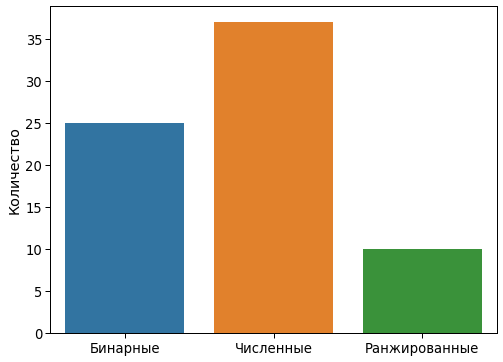

In [11]:
#ТОЛЬКО ДЛЯ КАРТИНКИ !!! РАСПРЕДЕЛЕНИЕ ТИПОВ ПРИЗНАКОВ
df = pd.read_csv('Tomsk-Almazov data ver 6.txt', sep='\t', header=0, names=headers, index_col=False, encoding='cp1251')
#df = pd.read_csv('../_data/Tomsk-Almazov data ver 6.txt', sep='\t', header=0, names=headers, index_col=False, encoding='cp1251')
df = df.set_index("Пациент")

df = df.drop('Дата_операции', axis=1)
df = df.drop('Начало_периода', axis=1)
df = df.drop('Конец_периода', axis=1)

for col in df.columns:
    if (df[col].nunique() <= 5) &(df[col].nunique() > 2) & (df[col].dtype != object) & (col not in targets):
        df[col] = df[col].astype('category')
for col in df.columns:
    if (df[col].nunique() <= 2) & (df[col].dtype != object) & (col not in targets):
        df[col] = df[col].astype('boolean')
        
NUMERICAL = df.select_dtypes(exclude=['category','boolean']).columns.tolist()
CATEGORICAL = df.select_dtypes(include=['category']).columns.tolist()
BINARY = df.select_dtypes(include=['boolean']).columns.tolist()

x = ['Бинарные', 'Численные', 'Ранжированные']
y = [len(BINARY), len(NUMERICAL), len(CATEGORICAL)]

sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(8,6))
ax = sns.barplot(x=x, y=y)
ax.set_ylabel('Количество')

In [12]:
df = pd.read_csv('Tomsk-Almazov data ver 6.txt', sep='\t', header=0, names=headers, index_col=False, encoding='cp1251')
df = df.set_index("Пациент")
df

,Дата_операции,Начало_периода,Конец_периода,Госпитальная_летальность,TND_Соматогенный_психоз,PND_Пароксизмальная_ночная_одышка,Продленное_ИВЛ,Заместительная_почечная_терапия,Кровотечение,Инфаркт_миокарда,...,Эрмасса,СЗП,Тромбоциты,Объем_кровопотери,Гемоглобин_опер,Гематокрит_опер,Креатинин_опер,АКШ,ПАК,ПМК
Пациент,,,,,,,,,,,,,,,,,,,,,
GACAAbN,NaN,20160510.0,20160531.0,0,0,0,0,0,0,0,...,0,0,0,280.0,105.0,30.0,NaN,1,1,0.0
GACACET,NaN,20120426.0,20120505.0,0,1,0,0,0,0,0,...,0,0,0,340.0,102.0,30.0,70.0,1,0,0.0
GACACuN,NaN,20161108.0,20161114.0,0,0,0,0,0,0,0,...,2,0,0,NaN,92.0,37.0,167.0,0,1,0.0
GACADLz,NaN,20130220.0,20130328.0,0,0,0,0,0,0,0,...,0,0,0,120.0,98.0,30.0,68.0,0,1,0.0
GACAFRq,NaN,20131225.0,20140203.0,0,0,0,0,0,0,0,...,0,0,0,400.0,100.0,30.0,76.0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,NaN,NaN,NaN,0,0,0,1,0,0,0,...,4,3,3,650.0,113.0,17.0,124.0,1,0,NaN
94,NaN,NaN,NaN,0,0,0,0,0,0,0,...,4,2,2,400.0,86.0,24.0,107.0,0,0,NaN
95,NaN,NaN,NaN,0,0,0,0,0,0,0,...,1,4,2,200.0,103.0,29.0,103.0,0,0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438 entries, GACAAbN to 97
Data columns (total 75 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Дата_операции                                  0 non-null      float64
 1   Начало_периода                                 341 non-null    float64
 2   Конец_периода                                  341 non-null    float64
 3   Госпитальная_летальность                       438 non-null    int64  
 4   TND_Соматогенный_психоз                        438 non-null    int64  
 5   PND_Пароксизмальная_ночная_одышка              438 non-null    int64  
 6   Продленное_ИВЛ                                 438 non-null    int64  
 7   Заместительная_почечная_терапия                438 non-null    int64  
 8   Кровотечение                                   438 non-null    int64  
 9   Инфаркт_миокарда                               438 non

In [13]:
nuls = df.isnull().mean().to_frame().sort_values(by=0, ascending = False)
nuls = nuls.reset_index()
nuls.columns = ['feature','%_nulls']
nuls['%_fulls'] = nuls['%_nulls'].apply(lambda x: 1 - x)
nuls.head(30)

,feature,%_nulls,%_fulls
0,Дата_операции,1.000000,0.000000
1,Гемоглобин_лаб,0.778539,0.221461
2,Сегмент_С,0.778539,0.221461
3,Сегмент_В,0.778539,0.221461
4,Сегмент_А,0.778539,0.221461
5,СКФ_лаб,0.778539,0.221461
6,Креатинин_лаб,0.778539,0.221461
7,Мочевина_лаб,0.778539,0.221461
8,Гематокрит_лаб,0.778539,0.221461
9,ЦА,0.534247,0.465753


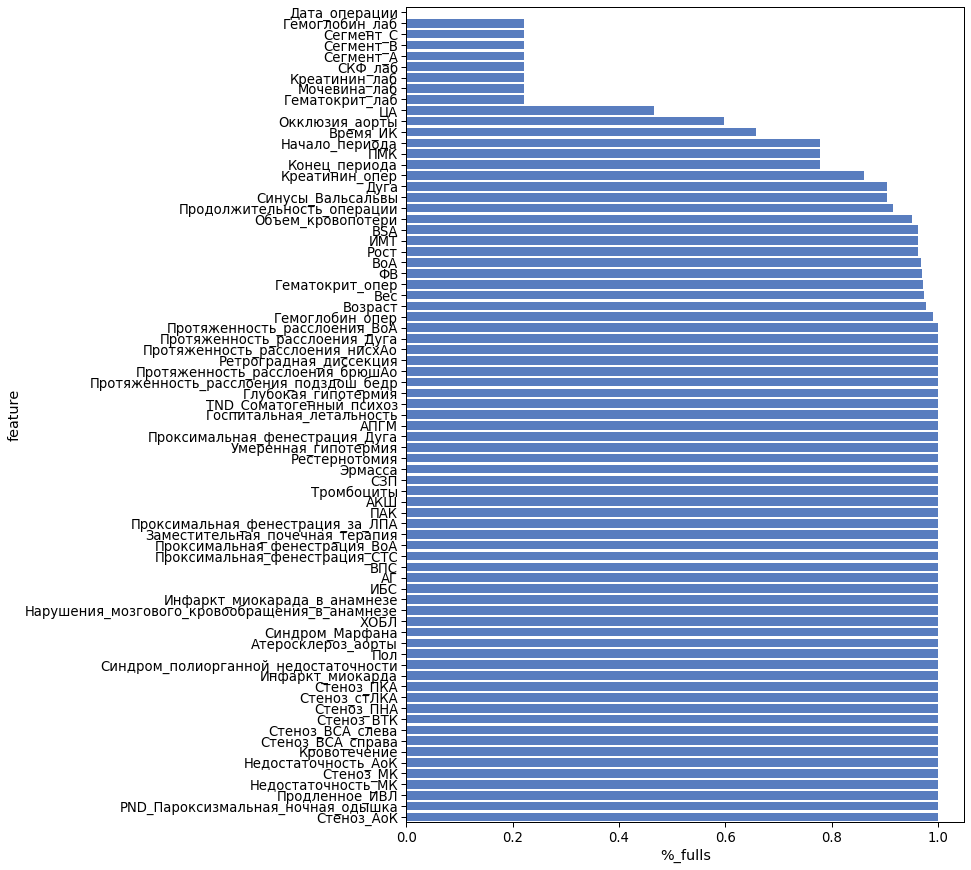

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 15))

sns.set_color_codes("muted")
sns.barplot(x="%_fulls", y='feature', data=nuls,
            label="Заполненные значения", color="b")


In [15]:
df = df.drop('Дата_операции', axis=1)
df = df.drop('Начало_периода', axis=1)
df = df.drop('Конец_периода', axis=1)
df = df.drop("Гемоглобин_лаб", axis=1)
df = df.drop("Гематокрит_лаб", axis=1)
df = df.drop("Мочевина_лаб", axis=1)
df = df.drop("Креатинин_лаб", axis=1)
df = df.drop("СКФ_лаб", axis=1)
df = df.drop("ЦА", axis=1)
df = df.drop("АПГМ", axis=1)
df = df.drop("Сегмент_В", axis=1)
df = df.drop("Сегмент_С", axis=1)
df = df.drop("Сегмент_А", axis=1)
df = df.drop("ПМК", axis=1)

In [7]:
nuls = df.isnull().mean().to_frame().sort_values(by=0, ascending = False)
nuls = nuls.reset_index()
nuls.columns = ['feature','%_nulls']
nuls['%_fulls'] = nuls['%_nulls'].apply(lambda x: 1 - x)
nuls.head(30)

,feature,%_nulls,%_fulls
0,Окклюзия_аорты,0.401826,0.598174
1,Время_ИК,0.342466,0.657534
2,Креатинин_опер,0.139269,0.860731
3,Cинусы_Вальсальвы,0.095890,0.904110
4,Дуга,0.095890,0.904110
5,Продолжительность_операции,0.084475,0.915525
6,Объем_кровопотери,0.047945,0.952055
7,BSA,0.036530,0.963470
8,Рост,0.036530,0.963470
9,ИМТ,0.036530,0.963470


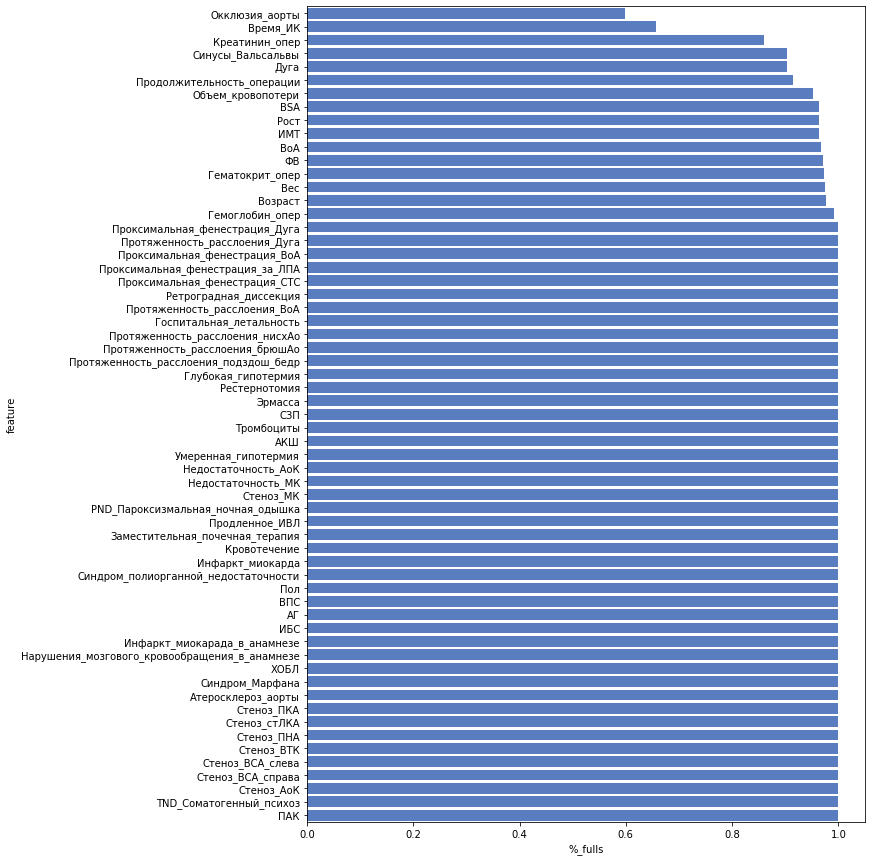

In [8]:
f, ax = plt.subplots(figsize=(10, 15))

sns.set_color_codes("muted")
sns.barplot(x="%_fulls", y='feature', data=nuls,
            label="Заполненные значения", color="b")

In [9]:
df

,Госпитальная_летальность,TND_Соматогенный_психоз,PND_Пароксизмальная_ночная_одышка,Продленное_ИВЛ,Заместительная_почечная_терапия,Кровотечение,Инфаркт_миокарда,Синдром_полиорганной_недостаточности,Возраст,Пол,...,Продолжительность_операции,Эрмасса,СЗП,Тромбоциты,Объем_кровопотери,Гемоглобин_опер,Гематокрит_опер,Креатинин_опер,АКШ,ПАК
Пациент,,,,,,,,,,,,,,,,,,,,,
GACAAbN,0,0,0,0,0,0,0,0,67.0,1,...,425.0,0,0,0,280.0,105.0,30.0,NaN,1,1
GACACET,0,1,0,0,0,0,0,0,28.0,0,...,300.0,0,0,0,340.0,102.0,30.0,70.0,1,0
GACACuN,0,0,0,0,0,0,0,0,83.0,1,...,225.0,2,0,0,NaN,92.0,37.0,167.0,0,1
GACADLz,0,0,0,0,0,0,0,0,64.0,1,...,265.0,0,0,0,120.0,98.0,30.0,68.0,0,1
GACAFRq,0,0,0,0,0,0,0,0,54.0,1,...,345.0,0,0,0,400.0,100.0,30.0,76.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0,0,0,1,0,0,0,1,59.0,1,...,570.0,4,3,3,650.0,113.0,17.0,124.0,1,0
94,0,0,0,0,0,0,0,0,59.0,0,...,440.0,4,2,2,400.0,86.0,24.0,107.0,0,0
95,0,0,0,0,0,0,0,0,55.0,1,...,390.0,1,4,2,200.0,103.0,29.0,103.0,0,0


In [16]:
for col in df.columns:
    if (df[col].nunique() <= 5) & (df[col].dtype != object) & (col not in targets):
        df[col] = df[col].astype('category')
        
NUMERICAL = df.select_dtypes(exclude=['category']).columns.tolist()
CATEGORICAL = df.select_dtypes(include=['category']).columns.tolist()
for tar in targets:
    if tar in NUMERICAL:
        NUMERICAL.remove(tar)
for tar in targets:
    if tar in CATEGORICAL:
        CATEGORICAL.remove(tar)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438 entries, GACAAbN to 97
Data columns (total 82 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Госпитальная_летальность                           438 non-null    int64  
 1   TND_Соматогенный_психоз                            438 non-null    int64  
 2   PND_Пароксизмальная_ночная_одышка                  438 non-null    int64  
 3   Продленное_ИВЛ                                     438 non-null    int64  
 4   Заместительная_почечная_терапия                    438 non-null    int64  
 5   Кровотечение                                       438 non-null    int64  
 6   Инфаркт_миокарда                                   438 non-null    int64  
 7   Синдром_полиорганной_недостаточности               438 non-null    int64  
 8   Возраст                                            438 non-null    float64
 9   Рост      

In [17]:
df = pd.get_dummies(df, prefix=CATEGORICAL, columns = CATEGORICAL, drop_first=True)

headers = df.columns.values.tolist()
headers = headers[len(targets):]
    
pd.set_option('display.max_columns', None)
df

,Госпитальная_летальность,TND_Соматогенный_психоз,PND_Пароксизмальная_ночная_одышка,Продленное_ИВЛ,Заместительная_почечная_терапия,Кровотечение,Инфаркт_миокарда,Синдром_полиорганной_недостаточности,Возраст,Рост,Вес,ИМТ,BSA,ФВ,Cинусы_Вальсальвы,ВоА,Дуга,Время_ИК,Окклюзия_аорты,Продолжительность_операции,Эрмасса,СЗП,Тромбоциты,Объем_кровопотери,Гемоглобин_опер,Гематокрит_опер,Креатинин_опер,Пол_1,ВПС_1,АГ_1,ИБС_1,Инфаркт_миокарада_в_анамнезе_1,Нарушения_мозгового_кровообращения_в_анамнезе_1,ХОБЛ_1,Синдром_Марфана_1,Атеросклероз_аорты_1,Стеноз_ПКА_1,Стеноз_ПКА_2,Стеноз_ПКА_3,Стеноз_ПКА_4,Стеноз_стЛКА_1,Стеноз_стЛКА_2,Стеноз_стЛКА_3,Стеноз_стЛКА_4,Стеноз_ПНА_1,Стеноз_ПНА_2,Стеноз_ПНА_3,Стеноз_ПНА_4,Стеноз_ВТК_1,Стеноз_ВТК_2,Стеноз_ВТК_3,Стеноз_ВСА_слева_1,Стеноз_ВСА_слева_2,Стеноз_ВСА_слева_3,Стеноз_ВСА_справа_1,Стеноз_ВСА_справа_2,Стеноз_ВСА_справа_3,Стеноз_АоК_1,Стеноз_АоК_2,Стеноз_АоК_3,Недостаточность_АоК_1,Недостаточность_АоК_2,Недостаточность_АоК_3,Стеноз_МК_1,Стеноз_МК_2,Стеноз_МК_3,Недостаточность_МК_1,Недостаточность_МК_2,Недостаточность_МК_3,Проксимальная_фенестрация_СТС_1,Проксимальная_фенестрация_ВоА_1,Проксимальная_фенестрация_Дуга_1,Проксимальная_фенестрация_за_ЛПА_1,Ретроградная_диссекция_1,Протяженность_расслоения_ВоА_1,Протяженность_расслоения_Дуга_1,Протяженность_расслоения_нисхАо_1,Протяженность_расслоения_брюшАо_1,Протяженность_расслоения_подздош_бедр_1,Глубокая_гипотермия_1,Умеренная_гипотермия_1,Рестернотомия_1,АКШ_1,ПАК_1
Пациент,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GACAAbN,0,0,0,0,0,0,0,0,67.0,169.0,75.0,26.3,1.84,40.0,41.0,73.0,40.0,NaN,NaN,425.0,0,0,0,280.0,105.0,30.0,NaN,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,1,1,1
GACACET,0,1,0,0,0,0,0,0,28.0,175.0,82.0,26.8,1.97,70.0,NaN,49.0,25.0,NaN,NaN,300.0,0,0,0,340.0,102.0,30.0,70.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
GACACuN,0,0,0,0,0,0,0,0,83.0,161.0,73.0,28.2,1.74,60.0,43.0,45.0,38.0,NaN,NaN,225.0,2,0,0,NaN,92.0,37.0,167.0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
GACADLz,0,0,0,0,0,0,0,0,64.0,188.0,111.0,31.4,2.39,62.0,39.8,50.0,37.0,NaN,NaN,265.0,0,0,0,120.0,98.0,30.0,68.0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
GACAFRq,0,0,0,0,0,0,0,0,54.0,171.0,56.0,19.2,1.67,53.0,48.0,26.0,24.0,127.0,NaN,345.0,0,0,0,400.0,100.0,30.0,76.0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0,0,0,1,0,0,0,1,59.0,165.0,70.0,25.5,1.80,62.0,42.0,47.0,48.0,315.0,180.0,570.0,4,3,3,650.0,113.0,17.0,124.0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
94,0,0,0,0,0,0,0,0,59.0,158.0,63.0,23.6,1.70,62.0,32.0,34.0,29.0,210.0,95.0,440.0,4,2,2,400.0,86.0,24.0,107.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
95,0,0,0,0,0,0,0,0,55.0,173.0,100.0,33.2,2.20,66.0,32.0,34.0,33.0,188.0,104.0,390.0,1,4,2,200.0,103.0,29.0,103.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438 entries, GACAAbN to 97
Data columns (total 84 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Госпитальная_летальность                         438 non-null    int64  
 1   TND_Соматогенный_психоз                          438 non-null    int64  
 2   PND_Пароксизмальная_ночная_одышка                438 non-null    int64  
 3   Продленное_ИВЛ                                   438 non-null    int64  
 4   Заместительная_почечная_терапия                  438 non-null    int64  
 5   Кровотечение                                     438 non-null    int64  
 6   Инфаркт_миокарда                                 438 non-null    int64  
 7   Синдром_полиорганной_недостаточности             438 non-null    int64  
 8   Возраст                                          428 non-null    float64
 9   Рост                            

In [18]:
df = df.dropna(thresh=80)

In [19]:
df

,Госпитальная_летальность,TND_Соматогенный_психоз,PND_Пароксизмальная_ночная_одышка,Продленное_ИВЛ,Заместительная_почечная_терапия,Кровотечение,Инфаркт_миокарда,Синдром_полиорганной_недостаточности,Возраст,Рост,Вес,ИМТ,BSA,ФВ,Cинусы_Вальсальвы,ВоА,Дуга,Время_ИК,Окклюзия_аорты,Продолжительность_операции,Эрмасса,СЗП,Тромбоциты,Объем_кровопотери,Гемоглобин_опер,Гематокрит_опер,Креатинин_опер,Пол_1,ВПС_1,АГ_1,ИБС_1,Инфаркт_миокарада_в_анамнезе_1,Нарушения_мозгового_кровообращения_в_анамнезе_1,ХОБЛ_1,Синдром_Марфана_1,Атеросклероз_аорты_1,Стеноз_ПКА_1,Стеноз_ПКА_2,Стеноз_ПКА_3,Стеноз_ПКА_4,Стеноз_стЛКА_1,Стеноз_стЛКА_2,Стеноз_стЛКА_3,Стеноз_стЛКА_4,Стеноз_ПНА_1,Стеноз_ПНА_2,Стеноз_ПНА_3,Стеноз_ПНА_4,Стеноз_ВТК_1,Стеноз_ВТК_2,Стеноз_ВТК_3,Стеноз_ВСА_слева_1,Стеноз_ВСА_слева_2,Стеноз_ВСА_слева_3,Стеноз_ВСА_справа_1,Стеноз_ВСА_справа_2,Стеноз_ВСА_справа_3,Стеноз_АоК_1,Стеноз_АоК_2,Стеноз_АоК_3,Недостаточность_АоК_1,Недостаточность_АоК_2,Недостаточность_АоК_3,Стеноз_МК_1,Стеноз_МК_2,Стеноз_МК_3,Недостаточность_МК_1,Недостаточность_МК_2,Недостаточность_МК_3,Проксимальная_фенестрация_СТС_1,Проксимальная_фенестрация_ВоА_1,Проксимальная_фенестрация_Дуга_1,Проксимальная_фенестрация_за_ЛПА_1,Ретроградная_диссекция_1,Протяженность_расслоения_ВоА_1,Протяженность_расслоения_Дуга_1,Протяженность_расслоения_нисхАо_1,Протяженность_расслоения_брюшАо_1,Протяженность_расслоения_подздош_бедр_1,Глубокая_гипотермия_1,Умеренная_гипотермия_1,Рестернотомия_1,АКШ_1,ПАК_1
Пациент,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GACAAbN,0,0,0,0,0,0,0,0,67.0,169.0,75.0,26.3,1.84,40.0,41.0,73.0,40.0,NaN,NaN,425.0,0,0,0,280.0,105.0,30.0,NaN,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,1,1,1
GACACET,0,1,0,0,0,0,0,0,28.0,175.0,82.0,26.8,1.97,70.0,NaN,49.0,25.0,NaN,NaN,300.0,0,0,0,340.0,102.0,30.0,70.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
GACACuN,0,0,0,0,0,0,0,0,83.0,161.0,73.0,28.2,1.74,60.0,43.0,45.0,38.0,NaN,NaN,225.0,2,0,0,NaN,92.0,37.0,167.0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
GACADLz,0,0,0,0,0,0,0,0,64.0,188.0,111.0,31.4,2.39,62.0,39.8,50.0,37.0,NaN,NaN,265.0,0,0,0,120.0,98.0,30.0,68.0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
GACAFRq,0,0,0,0,0,0,0,0,54.0,171.0,56.0,19.2,1.67,53.0,48.0,26.0,24.0,127.0,NaN,345.0,0,0,0,400.0,100.0,30.0,76.0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0,0,0,1,0,0,0,1,59.0,165.0,70.0,25.5,1.80,62.0,42.0,47.0,48.0,315.0,180.0,570.0,4,3,3,650.0,113.0,17.0,124.0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
94,0,0,0,0,0,0,0,0,59.0,158.0,63.0,23.6,1.70,62.0,32.0,34.0,29.0,210.0,95.0,440.0,4,2,2,400.0,86.0,24.0,107.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
95,0,0,0,0,0,0,0,0,55.0,173.0,100.0,33.2,2.20,66.0,32.0,34.0,33.0,188.0,104.0,390.0,1,4,2,200.0,103.0,29.0,103.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0


# Заполнение пропусков

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

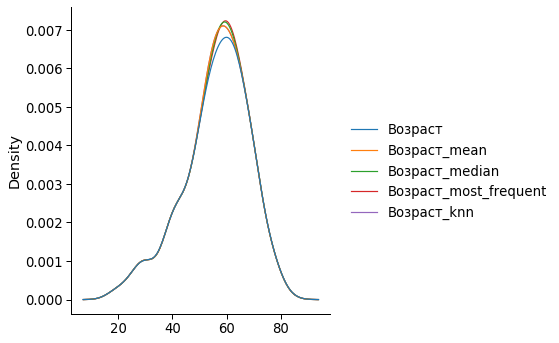

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


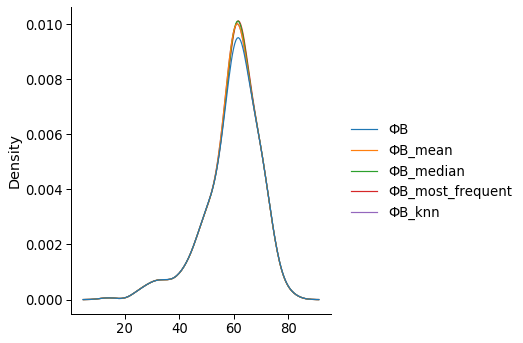

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


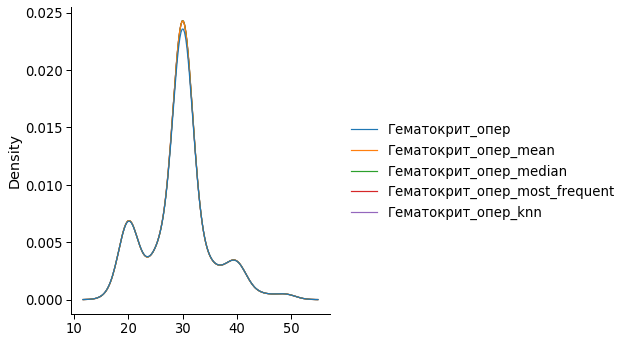

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


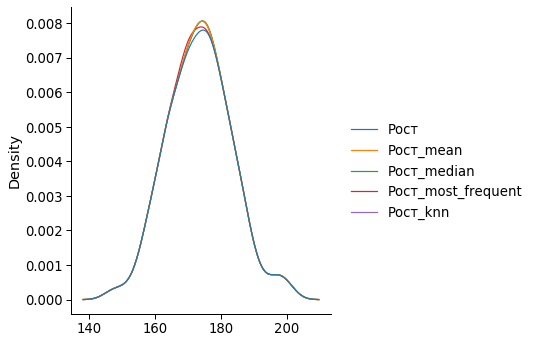

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


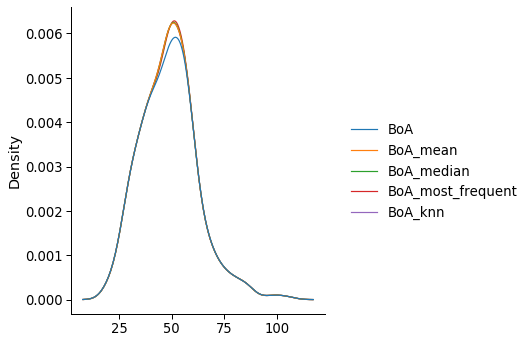

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


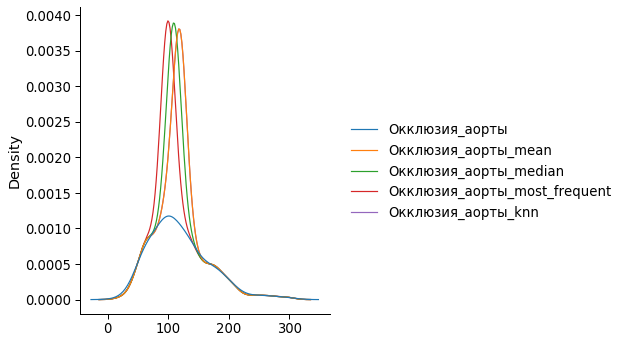

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


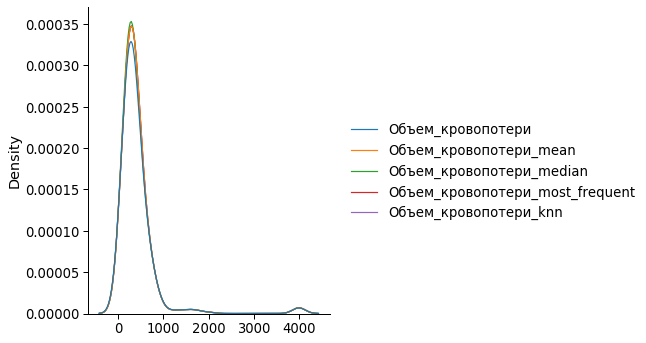

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


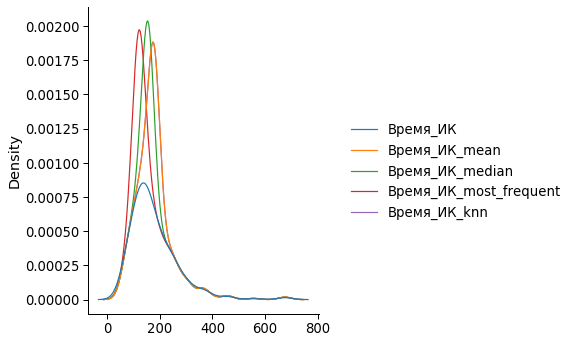

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


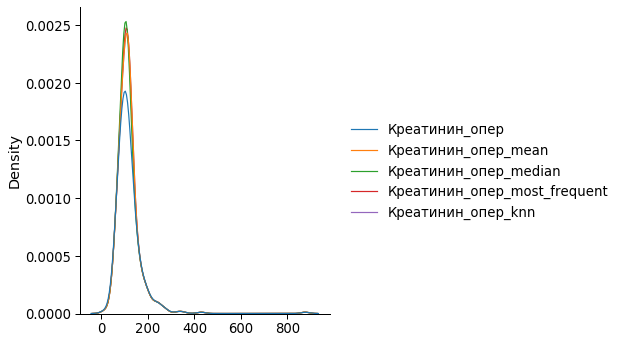

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


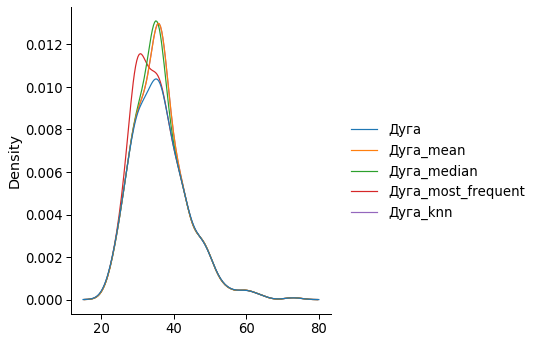

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


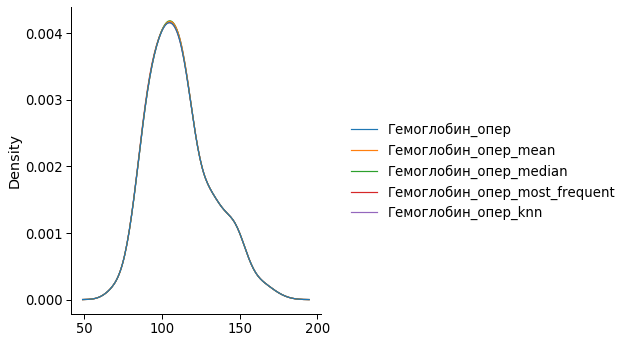

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


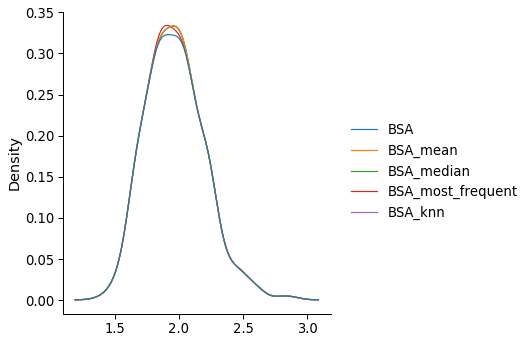

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


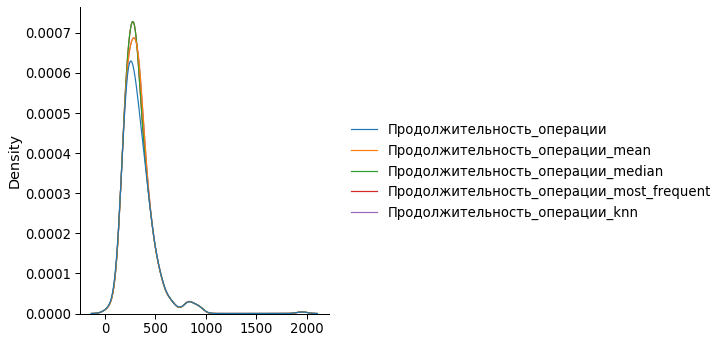

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


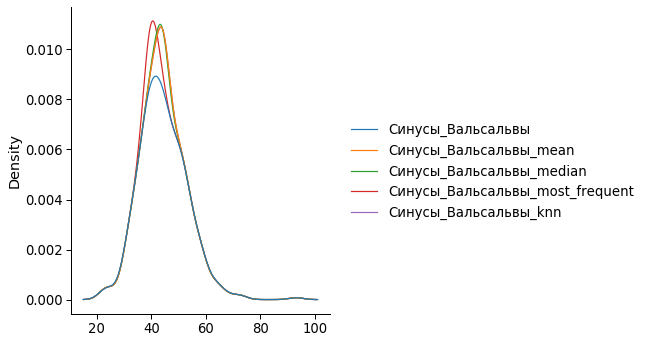

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


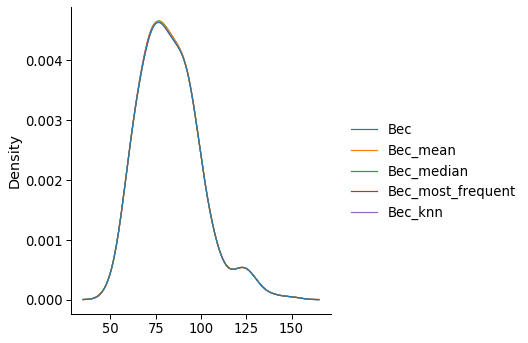

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


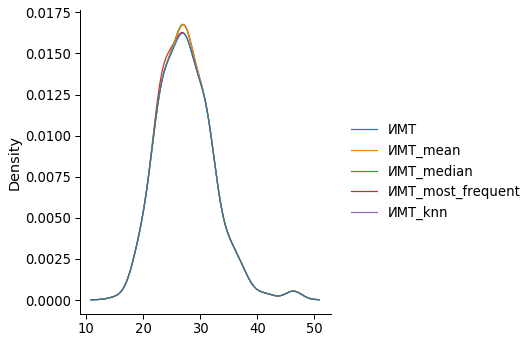

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

def simple_impute(df, col, strategy):
    imputer = SimpleImputer(missing_values=np.nan, strategy=strategy)
    imp_col = imputer.fit_transform(df[col].to_numpy().reshape(-1, 1))
    new_col = col+'_'+strategy
    df[new_col] = imp_col
    return df, new_col

def knn_impute(df, col):
    imputer = KNNImputer(n_neighbors=2)
    imp_col = imputer.fit_transform(df[col].to_numpy().reshape(-1, 1))
    imp_col = [item[0] for item in imp_col.tolist()]
    new_col = col+'_knn'
    df[new_col] = imp_col
    return df, new_col

cols = set(df.columns) - set(targets)
nan_cols=[col for col in cols if df[col].isnull().values.any()]
df_imp = df[nan_cols]

#Стратегия mean
mean_cols=[]
for col in nan_cols:
    df_imp, new_col = simple_impute(df_imp, col, 'mean')
    mean_cols.append(new_col)

#Стратегия median 
median_cols=[]
for col in nan_cols:
    df_imp, new_col = simple_impute(df_imp, col, 'median')
    median_cols.append(new_col)
    
#Стратегия freq 
freq_cols = []
for col in nan_cols:
    df_imp, new_col = simple_impute(df_imp, col, 'most_frequent')
    freq_cols.append(new_col)
    
#Стратегия knn 
knn_cols = []
for col in nan_cols:
    df_imp, new_col = knn_impute(df_imp, col)
    knn_cols.append(new_col)

from sklearn.metrics import mean_squared_error

for ind, item in enumerate(nan_cols):
    c=[item, mean_cols[ind],median_cols[ind],freq_cols[ind], knn_cols[ind]]
    sns.displot(df_imp[c], kind='kde')
    plt.show()


In [21]:
def mean_impute(df, col):
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp_col = imputer.fit_transform(df[col].to_numpy().reshape(-1, 1))
    imp_col = [item[0] for item in imp_col.tolist()]
    df[col] = imp_col

#Стратегия mean
for col in nan_cols:
    mean_impute(df, col)


c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [22]:
nuls = df.isnull().mean().to_frame().sort_values(by=0, ascending = False)
nuls = nuls.reset_index()
nuls.columns = ['feature','%_nulls']
nuls['%_fulls'] = nuls['%_nulls'].apply(lambda x: 1 - x)
nuls.head(30)

,feature,%_nulls,%_fulls
0,Госпитальная_летальность,0.0,1.0
1,Стеноз_ВСА_слева_3,0.0,1.0
2,Недостаточность_АоК_2,0.0,1.0
3,Недостаточность_АоК_1,0.0,1.0
4,Стеноз_АоК_3,0.0,1.0
5,Стеноз_АоК_2,0.0,1.0
6,Стеноз_АоК_1,0.0,1.0
7,Стеноз_ВСА_справа_3,0.0,1.0
8,Стеноз_ВСА_справа_2,0.0,1.0
9,Стеноз_ВСА_справа_1,0.0,1.0


In [ ]:
corr_matrix = df.loc[:,headers].corr(method='pearson', min_periods=50)
#print(corr_matrix)
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True)

In [23]:
pearson_corr = df.drop(targets, axis=1).corr(method='pearson', min_periods=50)
pos_corr = np.abs(np.nan_to_num(pearson_corr.values, 0.0))
strong_corr_pairs = []
for i in range(1, len(pos_corr)):
    if np.max(pos_corr[i, :i]) >= 0.5:
        j = np.argmax(pos_corr[i, :i])
        strong_corr_pairs.append((i, j, pearson_corr.values[i, j]))
cols = df.drop(targets, axis=1).columns
cols_dict = dict(list(zip(range(len(cols)), cols)))
strong_corr_df = pd.DataFrame(strong_corr_pairs).replace(cols_dict).sort_values(2, ascending=False)
strong_corr_df

,0,1,2
1,BSA,Вес,0.927541
0,ИМТ,Вес,0.829828
13,Протяженность_расслоения_брюшАо_1,Протяженность_расслоения_нисхАо_1,0.805200
8,Стеноз_ВСА_справа_1,Стеноз_ВСА_слева_1,0.702167
4,СЗП,Эрмасса,0.690464
2,Окклюзия_аорты,Время_ИК,0.669758
3,Продолжительность_операции,Время_ИК,0.665918
11,Протяженность_расслоения_ВоА_1,Проксимальная_фенестрация_ВоА_1,0.654840
12,Протяженность_расслоения_нисхАо_1,Протяженность_расслоения_ВоА_1,0.615592
6,Гематокрит_опер,Гемоглобин_опер,0.587758


In [24]:
df = df.drop("Вес", axis=1)
df = df.drop("Протяженность_расслоения_брюшАо_1", axis=1)

In [25]:
df.to_csv('Очищенные_данные Томск-Алмазов ver6.txt', sep='\t', encoding='cp1251')

#df.to_csv('../_data/Очищенные_данные Томск-Алмазов ver6.txt', sep='\t', encoding='cp1251')

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt

targets = ["Госпитальная_летальность", "TND_Соматогенный_психоз", "PND_Пароксизмальная_ночная_одышка",
          "Продленное_ИВЛ", "Заместительная_почечная_терапия", "Кровотечение", "Инфаркт_миокарда",
          "Синдром_полиорганной_недостаточности"]

df = pd.read_csv('Очищенные_данные Томск-Алмазов ver6.txt', sep='\t', header=0, index_col=0, encoding='cp1251')
#df = pd.read_csv('../_data/Очищенные_данные Томск-Алмазов ver6.txt', sep='\t', header=0, index_col=0, encoding='cp1251')

df = df.drop("Время_ИК", axis=1)
df = df.drop("Окклюзия_аорты", axis=1)

headers = df.columns.values.tolist()
headers = headers[len(targets):]

In [2]:
df

,Госпитальная_летальность,TND_Соматогенный_психоз,PND_Пароксизмальная_ночная_одышка,Продленное_ИВЛ,Заместительная_почечная_терапия,Кровотечение,Инфаркт_миокарда,Синдром_полиорганной_недостаточности,Возраст,Рост,...,Ретроградная_диссекция_1,Протяженность_расслоения_ВоА_1,Протяженность_расслоения_Дуга_1,Протяженность_расслоения_нисхАо_1,Протяженность_расслоения_подздош_бедр_1,Глубокая_гипотермия_1,Умеренная_гипотермия_1,Рестернотомия_1,АКШ_1,ПАК_1
Пациент,,,,,,,,,,,,,,,,,,,,,
GACAAbN,0,0,0,0,0,0,0,0,67.0,169.0,...,0,1,1,0,0,0,1,1,1,1
GACACET,0,1,0,0,0,0,0,0,28.0,175.0,...,0,0,0,0,0,0,0,0,1,0
GACACuN,0,0,0,0,0,0,0,0,83.0,161.0,...,0,0,0,0,0,0,0,0,0,1
GACADLz,0,0,0,0,0,0,0,0,64.0,188.0,...,0,0,0,0,0,0,1,1,0,1
GACAFRq,0,0,0,0,0,0,0,0,54.0,171.0,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0,0,0,1,0,0,0,1,59.0,165.0,...,0,0,0,0,0,1,0,0,1,0
94,0,0,0,0,0,0,0,0,59.0,158.0,...,0,0,0,0,0,0,1,0,0,0
95,0,0,0,0,0,0,0,0,55.0,173.0,...,1,0,0,0,0,0,1,0,0,0


In [215]:
#ПРИЗНАКИ ДЛЯ ПРЕДСКАЗАНИЯ
targets = ["Госпитальная_летальность", "TND_Соматогенный_психоз", "PND_Пароксизмальная_ночная_одышка",
          "Продленное_ИВЛ", "Заместительная_почечная_терапия", "Кровотечение", "Инфаркт_миокарда",
          "Синдром_полиорганной_недостаточности"]

#Госпитальная_летальность
target_GL = targets[0]
headers_GL = df.columns.values.tolist()
headers_GL = headers_GL[1:]
#TND
target_TND = targets[1]
headers_TND = df.columns.values.tolist()
for t in targets:
    if (t != "Кровотечение") & (t != "Инфаркт_миокарда"):
        headers_TND.remove(t)
#PND
target_PND = targets[2]
headers_PND = df.columns.values.tolist()
for t in targets:
    if (t != "Кровотечение") & (t != "Инфаркт_миокарда")& (t != "TND_Соматогенный_психоз")& (t != "Продленное_ИВЛ")& (t != "Заместительная_почечная_терапия"):
        headers_PND.remove(t)
#Продленная_ИВЛ
target_IVL = targets[3]
headers_IVL = df.columns.values.tolist()
for t in targets:
    if (t == "Продленное_ИВЛ"):
        headers_IVL.remove(t)
headers_IVL = headers_IVL[1:]
#ЗПТ
target_ZPT = targets[4]
headers_ZPT = df.columns.values.tolist()
for t in targets:
    if (t == "Заместительная_почечная_терапия"):
        headers_ZPT.remove(t)
headers_ZPT = headers_ZPT[1:]
#Кровотечение
target_BLOOD = targets[5]
headers_BLOOD = df.columns.values.tolist()
headers_BLOOD = headers_BLOOD[8:]
#Инфаркт
target_IM = targets[6]
headers_IM = df.columns.values.tolist()
for t in targets:
    if (t != "Кровотечение"):
        headers_IM.remove(t)
#Синдром_полиорганной_недостаточности
target_SPN = targets[7]
headers_SPN = df.columns.values.tolist()
for t in targets:
    if (t != "Заместительная_почечная_терапия"):
        headers_SPN.remove(t)

# Госпитальная летальность

# Анализ важных признаков

In [4]:
#Одномерный отбор признаков

#Признаки, имеющие наиболее выраженную взаимосвязь с целевой переменной, могут быть отобраны
#с помощью статистических критериев. Библиотека scikit-learn содержит класс SelectKBest,
#реализующий одномерный отбор признаков (univariate feature selection).
#Этот класс можно применять совместно с различными статистическими критериями для отбора заданного количества признаков.

#В примере ниже используется критерий хи-квадрат (chi-squared test) для неотрицательных признаков,
#чтобы отобрать 4 лучших признака.

# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#features = fit.transform(X)

def get_featureKBest(df, target, headers, num):
    X = df.loc[:, headers]
    Y = df.loc[:, target]
    test = SelectKBest(score_func=chi2, k=num)
    fit = test.fit(X, Y)
    features_scores = fit.scores_
    features = {}
    if len(headers) != len(features_scores):
        return features
    for i in range(len(features_scores)):
        features[headers[i]] = features_scores[i]
    sorted_tuple = sorted(features.items(), key=lambda x: x[1], reverse=True)
    return dict(sorted_tuple)
        
features_KBest = get_featureKBest(df, target_GL, headers_GL, 10)
#features_KBest

In [5]:
#Метод рекурсивного исключения признаков (recursive feature elimination, RFE) реализует следующий алгоритм:
#модель обучается на исходном наборе признаков и оценивает их значимость,
#затем исключается один или несколько наименее значимых признаков, модель обучается на оставшихся признаках,
#и так далее, пока не останется заданное количество лучших признаков.

#В примере ниже метод RFE применяется в сочетании с логистической регрессией для отбора 3-х лучших признаков.
#Для совместного использования с RFE можно выбирать различные модели, важно лишь
#чтобы они были достаточно эффективны и совместимы с RFE.

# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import SGDRegressor

def get_featureRFE(df, target, headers, num):
    X = df.loc[:, headers]
    Y = df.loc[:, target]
    model = SGDRegressor()
    rfe = RFE(model, num)
    fit = rfe.fit(X, Y)
    features_scores = fit.ranking_
    features = {}
    if len(headers) != len(features_scores):
        return features
    for i in range(len(features_scores)):
        features[headers[i]] = features_scores[i]
    sorted_tuple = sorted(features.items(), key=lambda x: x[1], reverse=False)
    return dict(sorted_tuple)
        
features_RFE = get_featureRFE(df, target_GL, headers_GL, 10)
#features_RFE


c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [6]:
#Отбор на основе важности признаков
#Ансамблевые алгоритмы на основе деревьев решений, такие как случайный лес (random forest), позволяют оценить важность признаков.

# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

def get_featureExtraTrees(df, target, headers, num):
    X = df.loc[:, headers]
    Y = df.loc[:, target]
    model = ExtraTreesClassifier()
    model.fit(X, Y)
    features_scores = model.feature_importances_
    features = {}
    if len(headers) != len(features_scores):
        return features
    for i in range(len(features_scores)):
        features[headers[i]] = features_scores[i]
    sorted_tuple = sorted(features.items(), key=lambda x: x[1], reverse=True)
    return dict(sorted_tuple)
        
features_ET = get_featureExtraTrees(df, target_GL, headers_GL, 10)
#features_ET


In [7]:
from sklearn.linear_model import Lasso

def get_featureLasso(df, target, headers, num=10):
    X = df.loc[:, headers]
    Y = df.loc[:, target]
    clf = Lasso(alpha=0.6)
    clf.fit(X, Y)
    features_scores = clf.coef_
    features = {}
    if len(headers) != len(features_scores):
        return features
    for i in range(len(features_scores)):
        if features_scores[i] != 0.0:
            features[headers[i]] = features_scores[i]
    sorted_tuple = sorted(features.items(), key=lambda x: x[1], reverse=True)
    return dict(sorted_tuple)
        
features_L = get_featureLasso(df, target_GL, headers_GL, 10)
features_L

{'Креатинин_опер': 0.0011248010818703342,
 'Объем_кровопотери': 0.00019910037137511487}

In [8]:
def feature_vote(features_KBest, features_RFE, features_ET, features_L):
    #Отбор фич по принципу: берем из каждого полученного 10 позиций, если совпадают голосованием, то берем
    k = 10
    f_1 = list(features_KBest)
    f_1 = f_1[:k]
    f_2 = list(features_RFE)
    f_2 = f_2[:k]
    f_3 = list(features_ET)
    f_3 = f_3[:k]
    f_4 = list(features_L)
    all_features = f_1+f_2+f_3+f_4

    to_vote_features = list(set(all_features))
    important_features_GL = []

    for f in to_vote_features:
        score = 0
        if f in f_1: score += 1
        else: score -= 1
        if f in f_2: score += 1
        else: score -= 1
        if f in f_3: score += 1
        else: score -= 1
        if f in f_4: score += 1
        else: score -= 1
        if score >= 0: #не знаю, ставить равно или нет (поставила, улучшает прогноз)
            important_features_GL.append(f)
    return important_features_GL

important_features_GL = feature_vote(features_KBest, features_RFE, features_ET, features_L)
important_features_GL

['СЗП',
 'Заместительная_почечная_терапия',
 'Возраст',
 'Креатинин_опер',
 'Объем_кровопотери',
 'Синдром_полиорганной_недостаточности',
 'Продолжительность_операции',
 'Гемоглобин_опер']

# Госпитальная летальность

# Моделирование

In [193]:
def vis_TruePredicted(true_value, predicted_value):
    
    plt.figure(figsize=(10,10))
    plt.scatter(true_value, predicted_value, c='crimson')
    sns.scatterplot(x=true_value, y=predicted_value)
    plt.xticks([0,1])
    plt.yticks([0,1])
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()
    
from sklearn.metrics import confusion_matrix

def vis_confusionMatrix(true_value, predicted_value):
    tn, fp, fn, tp = confusion_matrix(true_value, predicted_value).ravel()
    cm = [[tn, fn], [fp,tp]]
    #print(cm)
    sns.heatmap(cm, annot=True, fmt='g', cmap="mako")
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.title('Матрица ошибок',fontsize=15)
    plt.xlabel('Истинный класс', fontsize=15)
    plt.ylabel('Предсказанный класс', fontsize=15)
    plt.axis('equal')
    plt.show()
    
def vis_histogram(true_value, predicted_value):
    tn, fp, fn, tp = confusion_matrix(true_value, predicted_value).ravel()
    x = ['True Negative', 'True Positive', 'False Negative', 'False Positive']
    y = [tn, tp, fn,fp]
    sns.set_context("paper", font_scale=1.5) 
    plt.figure(figsize=(8,6))
    ax = sns.barplot(x=x, y=y)
    ax.set_ylabel('Количество')
    #sns.displot(data=false, color='red')
    plt.show()

In [155]:
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, accuracy_score, f1_score, make_scorer
from sklearn.model_selection import cross_validate

def evaluate_model(X_train, X_test, y_train, y_test, features, est):
    min_max_scaler = MinMaxScaler()
    X_train_scaled = min_max_scaler.fit_transform(X_train)
    X_test_scaled = min_max_scaler.transform(X_test)
    
    all_accuracies = cross_validate(estimator=est, X=X_train, y=y_train, cv=20, scoring=['roc_auc','accuracy','f1'])
    est.fit(X_train, y_train)
    pred_test = est.predict(X_test)
    pred_train = est.predict(X_train)
    #rounded_pred = [round(value) for value in pred_test]
    #for i in range(len(rounded_pred)):
    #    if rounded_pred[i] > 1.0:
    #        rounded_pred[i] = 1.0
    #rounded_pred_train = [round(value) for value in pred_train]
    #for i in range(len(rounded_pred_train)):
    #    if rounded_pred_train[i] > 1.0:
    #        rounded_pred_train[i] = 1.0

    return pd.DataFrame({
        'train_MSE': [np.sqrt(mean_squared_error(y_train, pred_train))], #отслеживание переобучения
        'test_ROC_AUC': [roc_auc_score(y_train, pred_train)],
        'train_accuracy':[accuracy_score(y_train, pred_train)],
        'train_f-score': [r2_score(y_train, pred_train)],
        'MSE': [np.sqrt(mean_squared_error(y_test, pred_test))], #оценка теста
        'ROC_AUC': [roc_auc_score(y_test, pred_test)],
        'accuracy': [accuracy_score(y_test, pred_test)],
        'f-score': [f1_score(y_test, pred_test)],
        'crossval_ROC_AUC-mean': [all_accuracies['test_roc_auc'].mean()],
        'crossval_f-score-mean': [all_accuracies['test_f1'].mean()],
    }), pred_test, y_test


In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

def simple_pred(df, important_features, target, model):
    X = df[important_features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51, stratify=y)
    return evaluate_model(X_train, X_test, y_train, y_test, important_features, model)

def SMOTE_pred(df, important_features, target, model):
    smote = SMOTE()
    X, y = smote.fit_sample(df[important_features], df[target])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51, stratify=y)
    return evaluate_model(X_train, X_test, y_train, y_test, important_features, model)

def NearMiss_pred(df, important_features, target, model):
    nr = NearMiss()
    X, y = nr.fit_sample(df[important_features], df[target])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51, stratify=y)
    return evaluate_model(X_train, X_test, y_train, y_test, important_features, model)
    

Линейная регрессия

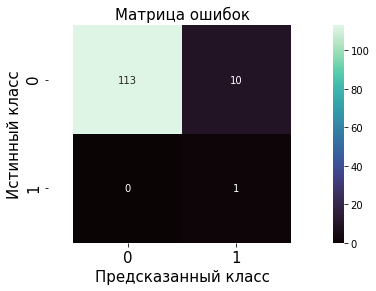

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.25,0.653846,0.9375,0.23899,0.283981,0.545455,0.919355,0.166667,0.65,0.316667


In [156]:
#Логистическая регрессия 
model = LogisticRegression()
errors, predictions, y_test = simple_pred(df, important_features_GL, target_GL, model)
vis_confusionMatrix(y_test, predictions)
errors

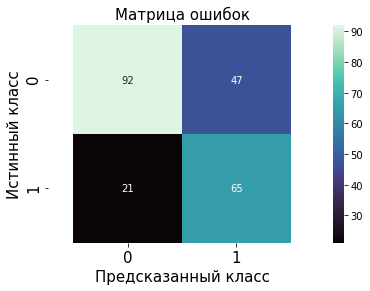

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.534522,0.714437,0.714286,-0.142861,0.549747,0.697258,0.697778,0.656566,0.813525,0.67382


In [159]:
#Логистическая регрессия со SMOTE
model = LogisticRegression()
errors, predictions, y_test = SMOTE_pred(df, important_features_GL, target_GL, model)
vis_confusionMatrix(y_test, predictions)
errors

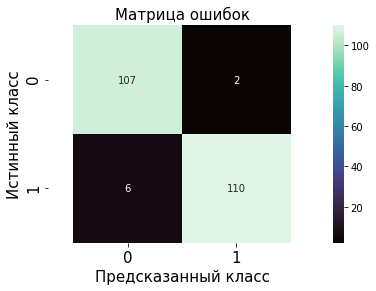

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.0,1.0,1.0,1.0,0.188562,0.964523,0.964444,0.964912,0.976849,0.918767


In [170]:
#Случайный лес со SMOTE
model = RandomForestClassifier()
errors, predictions, y_test = SMOTE_pred(df, important_features_GL, target_GL, model)
vis_confusionMatrix(y_test, predictions)
errors

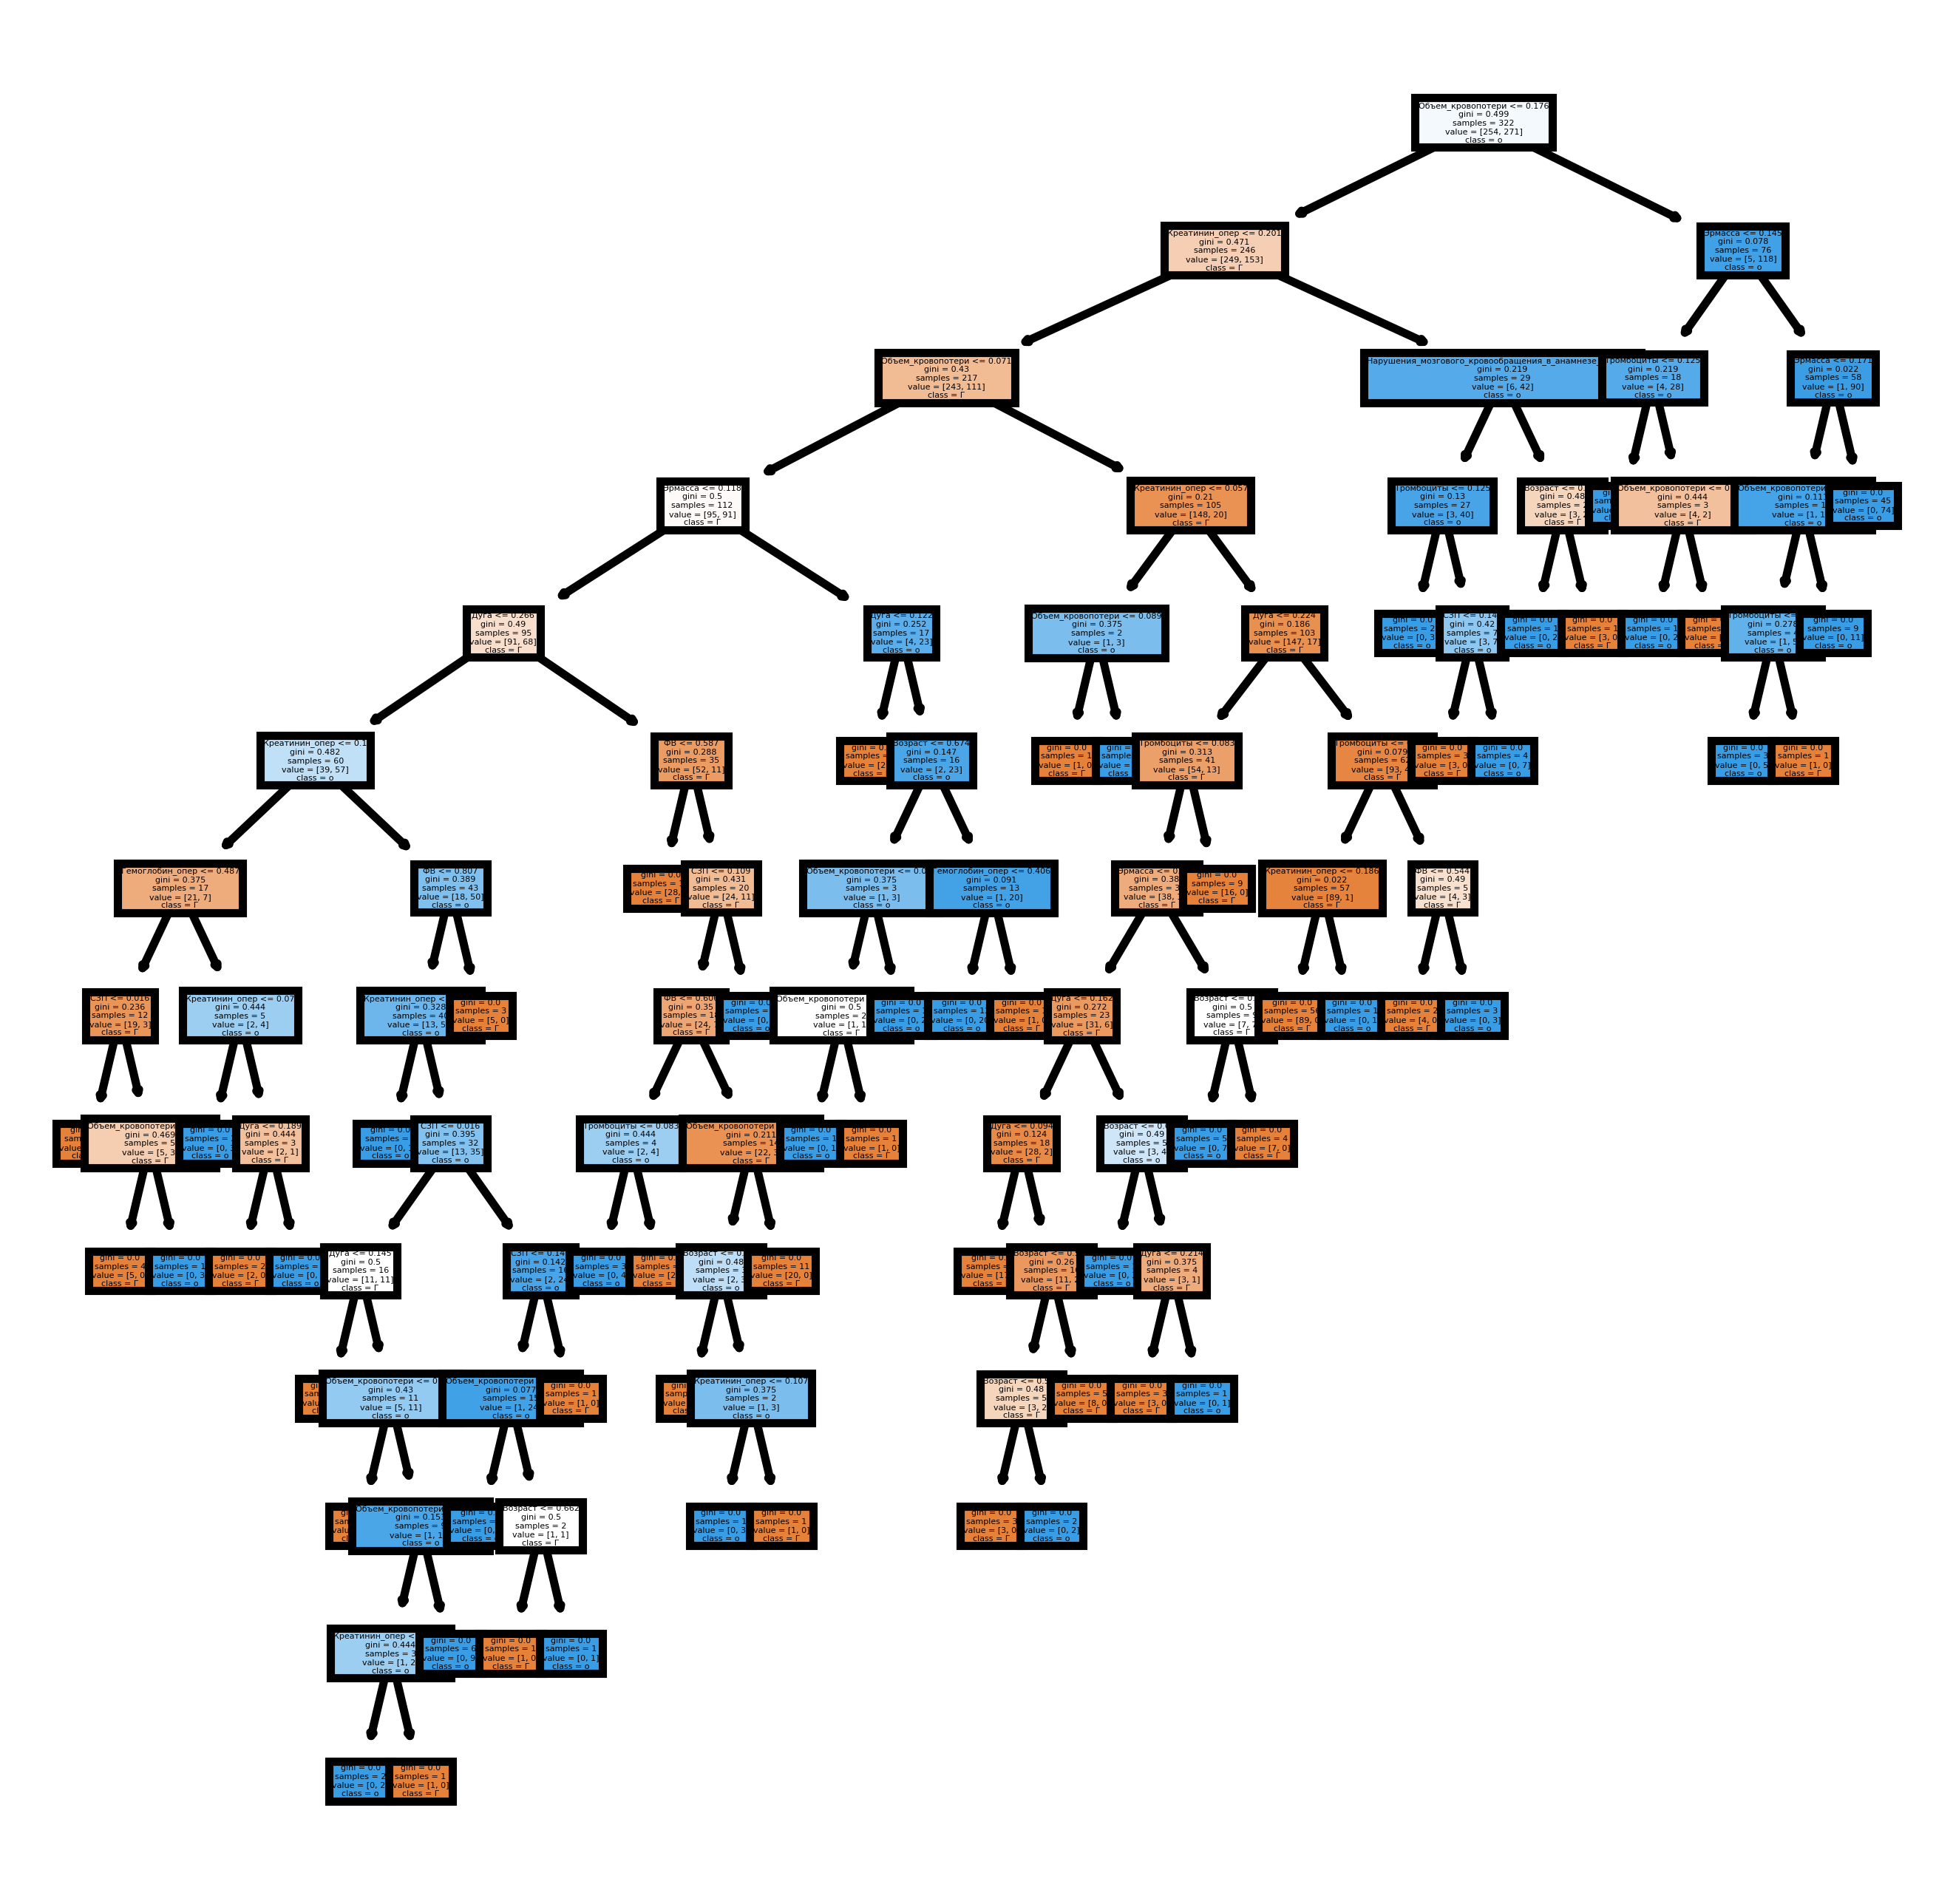

In [186]:
model = RandomForestClassifier(n_estimators=10)
smote = SMOTE()
X, y = smote.fit_sample(df[important_features_GL], df[target_GL])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51, stratify=y)
min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)
model.fit(X_train_scaled, y_train)
estimator = model.estimators_[5]
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator,
                feature_names=X.columns,
                filled=True,
                rounded=True)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
from sklearn import tree
tree.plot_tree(estimator,
               feature_names = important_features_GL, 
               class_names=target_GL,
               filled = True);
fig.savefig('rf_individualtree.png')

 XGBoost

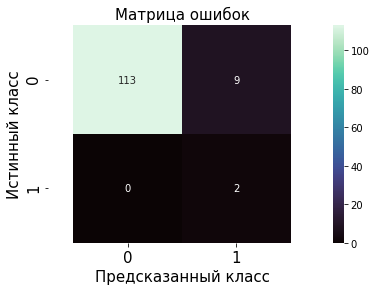

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.0,1.0,1.0,1.0,0.269408,0.590909,0.927419,0.307692,0.620879,0.233333


In [161]:
#XGBoost
import warnings
warnings.filterwarnings('ignore')

model = xgboost.XGBClassifier(verbosity=0)
errors, predictions, y_test = simple_pred(df, important_features_GL, target_GL, model)
vis_confusionMatrix(y_test, predictions)
errors

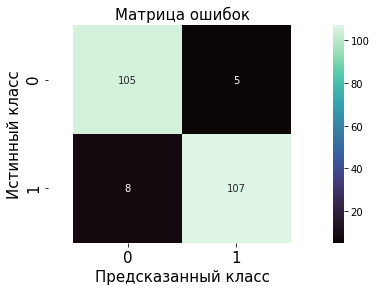

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.0,1.0,1.0,1.0,0.24037,0.94228,0.942222,0.942731,0.977663,0.922374


In [162]:
#XGBoost со SMOTE
model = xgboost.XGBClassifier(verbosity=0)
errors, predictions, y_test = SMOTE_pred(df, important_features_GL, target_GL, model)
vis_confusionMatrix(y_test, predictions)
errors

# TND_Соматогенный_психоз

In [163]:
features_KBest = get_featureKBest(df, target_TND, headers_TND, 10)
features_RFE = get_featureRFE(df, target_TND, headers_TND, 10)
features_ET = get_featureExtraTrees(df, target_TND, headers_TND, 10)
features_L = get_featureLasso(df, target_TND, headers_TND, 10)

important_features_TND = feature_vote(features_KBest, features_RFE, features_ET, features_L)
important_features_TND

['Нарушения_мозгового_кровообращения_в_анамнезе_1',
 'СЗП',
 'ФВ',
 'Тромбоциты',
 'Продолжительность_операции',
 'Эрмасса',
 'Креатинин_опер',
 'Объем_кровопотери',
 'Гемоглобин_опер']

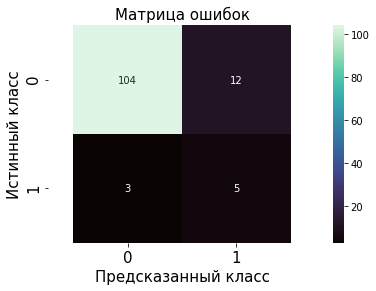

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.343592,0.563789,0.881944,-0.030737,0.347804,0.63304,0.879032,0.4,0.697276,0.131667


In [164]:
#Логистическая регрессия 
model = LogisticRegression()
errors, predictions, y_test = simple_pred(df, important_features_TND, target_TND, model)
vis_confusionMatrix(y_test, predictions)
errors

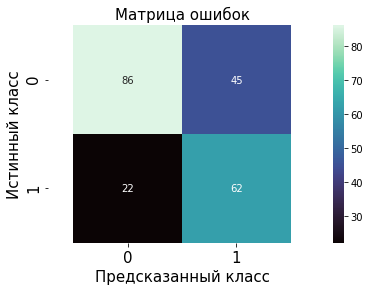

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.522059,0.727566,0.727455,-0.090185,0.558236,0.687868,0.688372,0.649215,0.78555,0.681221


In [165]:
#Логистическая регрессия со SMOTE
model = LogisticRegression()
errors, predictions, y_test = SMOTE_pred(df, important_features_TND, target_TND, model)
vis_confusionMatrix(y_test, predictions)
errors

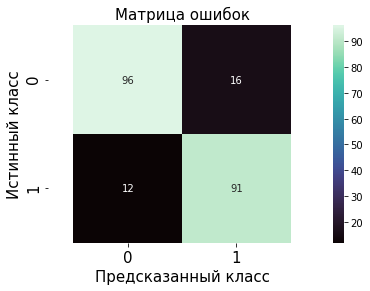

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.0,1.0,1.0,1.0,0.360877,0.869678,0.869767,0.866667,0.953058,0.890481


In [166]:
#Случайный лес со SMOTE
model = RandomForestClassifier()
errors, predictions, y_test = SMOTE_pred(df, important_features_TND, target_TND, model)
vis_confusionMatrix(y_test, predictions)
errors

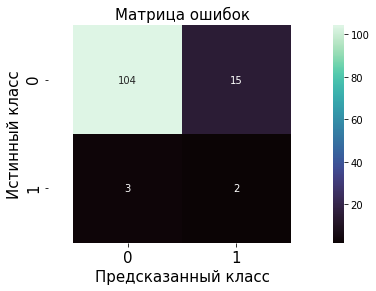

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.0,1.0,1.0,1.0,0.381,0.544805,0.854839,0.181818,0.606731,0.112619


In [167]:
#XGBoost
model = xgboost.XGBClassifier(verbosity=0)
errors, predictions, y_test = simple_pred(df, important_features_TND, target_TND, model)
vis_confusionMatrix(y_test, predictions)
errors

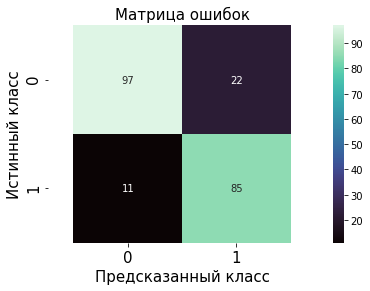

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.0,1.0,1.0,1.0,0.391776,0.84627,0.846512,0.837438,0.936592,0.851519


In [168]:
#XGBoost со SMOTE
model = xgboost.XGBClassifier(verbosity=0)
errors, predictions, y_test = SMOTE_pred(df, important_features_TND, target_TND, model)
vis_confusionMatrix(y_test, predictions)
errors

# PND_Пароксизмальная_ночная_одышка

In [187]:
features_KBest = get_featureKBest(df, target_PND, headers_PND, 10)
features_RFE = get_featureRFE(df, target_PND, headers_PND, 10)
features_ET = get_featureExtraTrees(df, target_PND, headers_PND, 10)
features_L = get_featureLasso(df, target_PND, headers_PND, 10)

important_features_PND = feature_vote(features_KBest, features_RFE, features_ET, features_L)
important_features_PND

['СЗП',
 'Рост',
 'Тромбоциты',
 'Cинусы_Вальсальвы',
 'Креатинин_опер',
 'Объем_кровопотери',
 'Дуга',
 'ФВ',
 'Гемоглобин_опер']

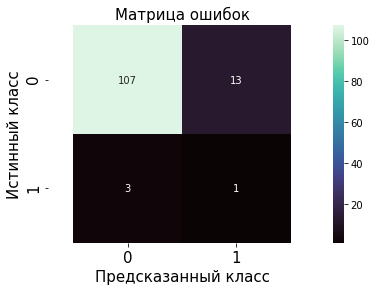

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.333333,0.528342,0.888889,-0.095187,0.359211,0.522078,0.870968,0.111111,0.65016,0.083333


In [188]:
#Логистическая регрессия 
model = LogisticRegression()
errors, predictions, y_test = simple_pred(df, important_features_PND, target_PND, model)
vis_confusionMatrix(y_test, predictions)
errors

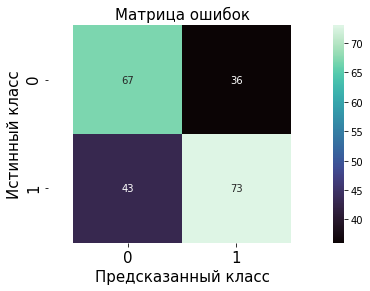

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.585206,0.657506,0.657534,-0.369868,0.600609,0.639408,0.639269,0.648889,0.717751,0.654711


In [189]:
#Логистическая регрессия со SMOTE
model = LogisticRegression()
errors, predictions, y_test = SMOTE_pred(df, important_features_PND, target_PND, model)
vis_confusionMatrix(y_test, predictions)
errors

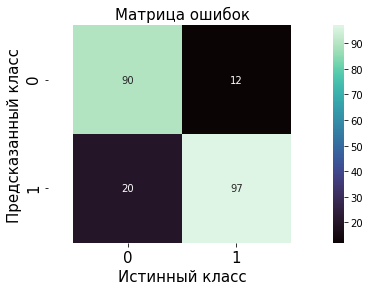

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.0,1.0,1.0,1.0,0.382255,0.854045,0.853881,0.858407,0.969896,0.900091


In [194]:
#Случайный лес со SMOTE
model = RandomForestClassifier()
errors, predictions, y_test = SMOTE_pred(df, important_features_PND, target_PND, model)
vis_confusionMatrix(y_test, predictions)
errors

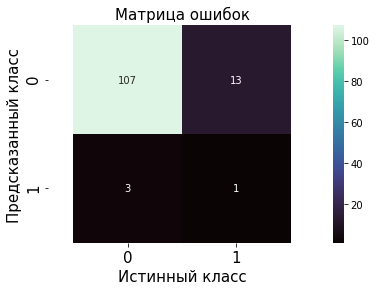

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.0,1.0,1.0,1.0,0.359211,0.522078,0.870968,0.111111,0.527724,0.066667


In [195]:
#XGBoost
model = xgboost.XGBClassifier(verbosity=0)
errors, predictions, y_test = simple_pred(df, important_features_PND, target_PND, model)
vis_confusionMatrix(y_test, predictions)
errors

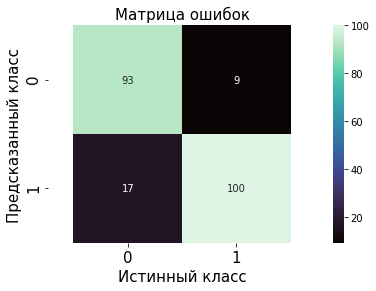

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.0,1.0,1.0,1.0,0.34456,0.881443,0.881279,0.884956,0.968688,0.91802


In [197]:
#XGBoost со SMOTE
model = xgboost.XGBClassifier(verbosity=0)
errors, predictions, y_test = SMOTE_pred(df, important_features_PND, target_PND, model)
vis_confusionMatrix(y_test, predictions)
errors

# Продленное_ИВЛ

In [204]:
features_KBest = get_featureKBest(df, target_IVL, headers_IVL, 10)
features_RFE = get_featureRFE(df, target_IVL, headers_IVL, 10)
features_ET = get_featureExtraTrees(df, target_IVL, headers_IVL, 10)
features_L = get_featureLasso(df, target_IVL, headers_IVL, 10)

important_features_IVL = feature_vote(features_KBest, features_RFE, features_ET, features_L)
important_features_IVL

['СЗП',
 'Тромбоциты',
 'Заместительная_почечная_терапия',
 'Креатинин_опер',
 'Объем_кровопотери',
 'Синдром_полиорганной_недостаточности',
 'Продолжительность_операции',
 'Стеноз_ВСА_слева_1',
 'Эрмасса']

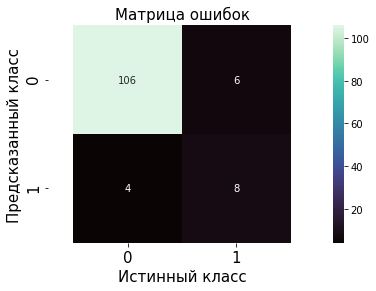

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.220479,0.830928,0.951389,0.493912,0.283981,0.767532,0.919355,0.615385,0.944071,0.636667


In [206]:
#Логистическая регрессия 
model = LogisticRegression()
errors, predictions, y_test = simple_pred(df, important_features_IVL, target_IVL, model)
vis_confusionMatrix(y_test, predictions)
errors

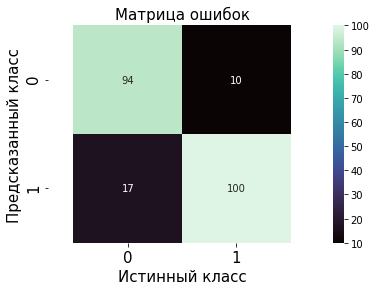

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.341993,0.883071,0.883041,0.532162,0.349531,0.877969,0.877828,0.881057,0.941297,0.877881


In [208]:
#Логистическая регрессия со SMOTE
model = LogisticRegression()
errors, predictions, y_test = SMOTE_pred(df, important_features_IVL, target_IVL, model)
vis_confusionMatrix(y_test, predictions)
errors

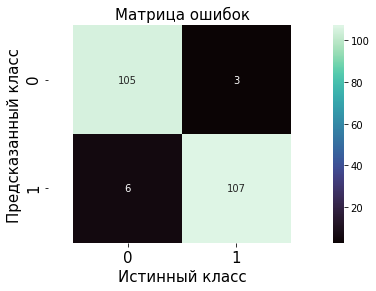

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.0,1.0,1.0,1.0,0.201802,0.959337,0.959276,0.959641,0.979845,0.925502


In [209]:
#Случайный лес со SMOTE
model = RandomForestClassifier()
errors, predictions, y_test = SMOTE_pred(df, important_features_IVL, target_IVL, model)
vis_confusionMatrix(y_test, predictions)
errors

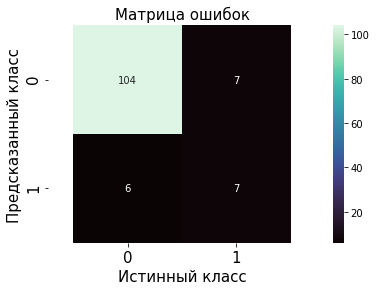

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.0,1.0,1.0,1.0,0.323788,0.722727,0.895161,0.518519,0.96891,0.665


In [210]:
#XGBoost
model = xgboost.XGBClassifier(verbosity=0)
errors, predictions, y_test = simple_pred(df, important_features_IVL, target_IVL, model)
vis_confusionMatrix(y_test, predictions)
errors

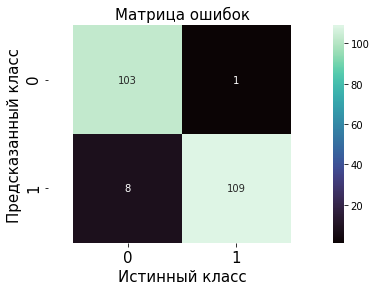

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.0,1.0,1.0,1.0,0.201802,0.959419,0.959276,0.960352,0.969699,0.929042


In [211]:
#XGBoost со SMOTE
model = xgboost.XGBClassifier(verbosity=0)
errors, predictions, y_test = SMOTE_pred(df, important_features_IVL, target_IVL, model)
vis_confusionMatrix(y_test, predictions)
errors

# Заместительная_почечная_терапия

In [216]:
features_KBest = get_featureKBest(df, target_ZPT, headers_ZPT, 10)
features_RFE = get_featureRFE(df, target_ZPT, headers_ZPT, 10)
features_ET = get_featureExtraTrees(df, target_ZPT, headers_ZPT, 10)
features_L = get_featureLasso(df, target_ZPT, headers_ZPT, 10)

important_features_ZPT = feature_vote(features_KBest, features_RFE, features_ET, features_L)
important_features_ZPT

['Синдром_полиорганной_недостаточности',
 'СЗП',
 'Стеноз_ВСА_справа_1',
 'Рост',
 'Тромбоциты',
 'Продолжительность_операции',
 'Эрмасса',
 'Креатинин_опер',
 'Протяженность_расслоения_подздош_бедр_1',
 'Объем_кровопотери',
 'Гемоглобин_опер',
 'Продленное_ИВЛ']

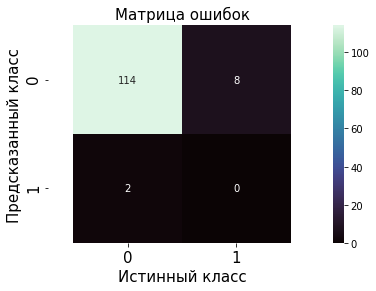

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.204124,0.674626,0.958333,0.249837,0.283981,0.491379,0.919355,0.0,NaN,NaN


In [219]:
#Логистическая регрессия 
model = LogisticRegression()
errors, predictions, y_test = simple_pred(df, important_features_ZPT, target_ZPT, model)
vis_confusionMatrix(y_test, predictions)
errors

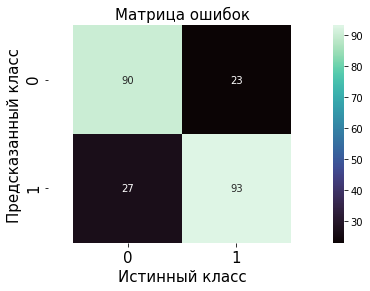

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.398704,0.841,0.841035,0.364138,0.463241,0.785477,0.785408,0.788136,0.893917,0.834045


In [218]:
#Логистическая регрессия со SMOTE
model = LogisticRegression()
errors, predictions, y_test = SMOTE_pred(df, important_features_ZPT, target_ZPT, model)
vis_confusionMatrix(y_test, predictions)
errors

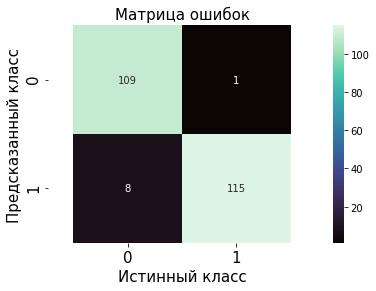

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.0,1.0,1.0,1.0,0.196537,0.961502,0.961373,0.962343,0.991209,0.960183


In [220]:
#Случайный лес со SMOTE
model = RandomForestClassifier()
errors, predictions, y_test = SMOTE_pred(df, important_features_ZPT, target_ZPT, model)
vis_confusionMatrix(y_test, predictions)
errors

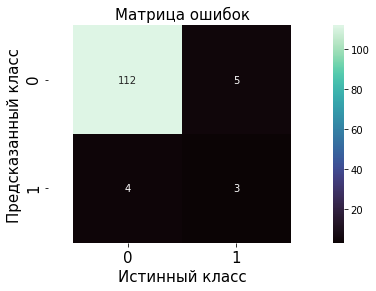

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.0,1.0,1.0,1.0,0.269408,0.670259,0.927419,0.4,NaN,NaN


In [221]:
#XGBoost
model = xgboost.XGBClassifier(verbosity=0)
errors, predictions, y_test = simple_pred(df, important_features_ZPT, target_ZPT, model)
vis_confusionMatrix(y_test, predictions)
errors

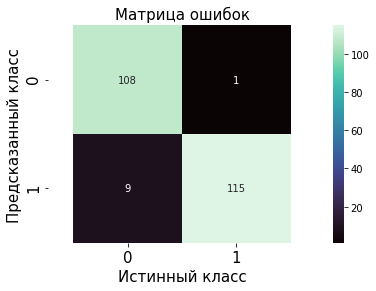

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.0,1.0,1.0,1.0,0.207168,0.957228,0.957082,0.958333,0.978571,0.95873


In [222]:
#XGBoost со SMOTE
model = xgboost.XGBClassifier(verbosity=0)
errors, predictions, y_test = SMOTE_pred(df, important_features_ZPT, target_ZPT, model)
vis_confusionMatrix(y_test, predictions)
errors

# Кровотечение

In [223]:
features_KBest = get_featureKBest(df, target_BLOOD, headers_BLOOD, 10)
features_RFE = get_featureRFE(df, target_BLOOD, headers_BLOOD, 10)
features_ET = get_featureExtraTrees(df, target_BLOOD, headers_BLOOD, 10)
features_L = get_featureLasso(df, target_BLOOD, headers_BLOOD, 10)

important_features_BLOOD = feature_vote(features_KBest, features_RFE, features_ET, features_L)
important_features_BLOOD


['Гемоглобин_опер',
 'СЗП',
 'Рост',
 'ФВ',
 'Тромбоциты',
 'Продолжительность_операции',
 'Эрмасса',
 'ИМТ',
 'Гематокрит_опер',
 'Объем_кровопотери']

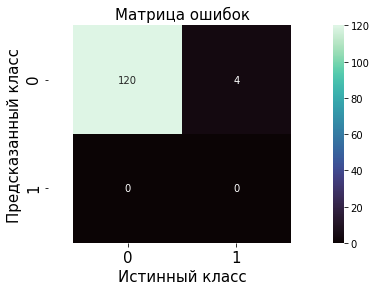

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.186339,0.5,0.965278,-0.035971,0.179605,0.5,0.967742,0.0,NaN,NaN


In [224]:
#Логистическая регрессия 
model = LogisticRegression()
errors, predictions, y_test = simple_pred(df, important_features_BLOOD, target_BLOOD, model)
vis_confusionMatrix(y_test, predictions)
errors

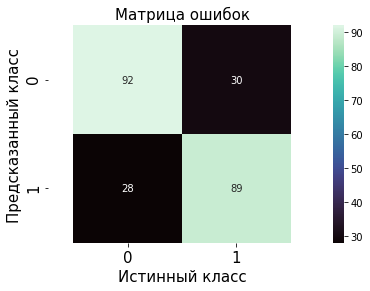

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.490484,0.759418,0.759425,0.037699,0.492623,0.757283,0.757322,0.754237,0.826432,0.760562


In [225]:
#Логистическая регрессия со SMOTE
model = LogisticRegression()
errors, predictions, y_test = SMOTE_pred(df, important_features_BLOOD, target_BLOOD, model)
vis_confusionMatrix(y_test, predictions)
errors

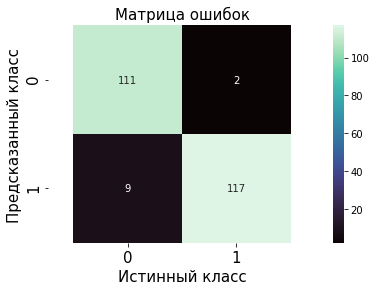

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.0,1.0,1.0,1.0,0.214535,0.954097,0.953975,0.955102,0.998067,0.969594


In [226]:
#Случайный лес со SMOTE
model = RandomForestClassifier()
errors, predictions, y_test = SMOTE_pred(df, important_features_BLOOD, target_BLOOD, model)
vis_confusionMatrix(y_test, predictions)
errors

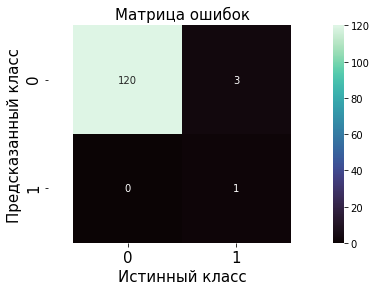

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.0,1.0,1.0,1.0,0.155543,0.625,0.975806,0.4,NaN,NaN


In [227]:
#XGBoost
model = xgboost.XGBClassifier(verbosity=0)
errors, predictions, y_test = simple_pred(df, important_features_BLOOD, target_BLOOD, model)
vis_confusionMatrix(y_test, predictions)
errors

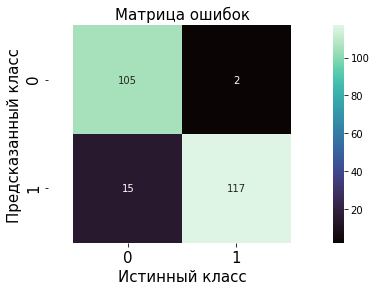

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.0,1.0,1.0,1.0,0.266702,0.929097,0.92887,0.932271,0.997194,0.977414


In [228]:
#XGBoost со SMOTE
model = xgboost.XGBClassifier(verbosity=0)
errors, predictions, y_test = SMOTE_pred(df, important_features_BLOOD, target_BLOOD, model)
vis_confusionMatrix(y_test, predictions)
errors

# Инфаркт_миокарда

In [229]:
features_KBest = get_featureKBest(df, target_IM, headers_IM, 10)
features_RFE = get_featureRFE(df, target_IM, headers_IM, 10)
features_ET = get_featureExtraTrees(df, target_IM, headers_IM, 10)
features_L = get_featureLasso(df, target_IM, headers_IM, 10)

important_features_IM = feature_vote(features_KBest, features_RFE, features_ET, features_L)
important_features_IM

['СЗП',
 'Cинусы_Вальсальвы',
 'Стеноз_стЛКА_3',
 'Стеноз_стЛКА_1',
 'Продолжительность_операции',
 'Эрмасса',
 'Креатинин_опер',
 'Объем_кровопотери']

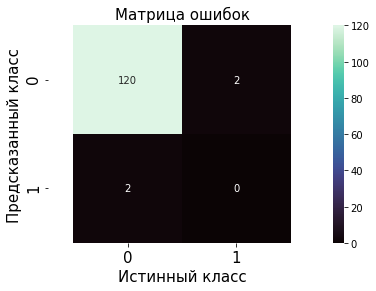

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.058926,0.875,0.996528,0.746479,0.179605,0.491803,0.967742,0.0,NaN,NaN


In [230]:
#Логистическая регрессия 
model = LogisticRegression()
errors, predictions, y_test = simple_pred(df, important_features_IM, target_IM, model)
vis_confusionMatrix(y_test, predictions)
errors

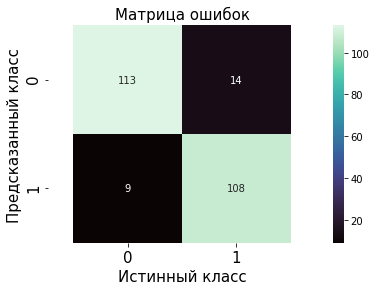

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.244661,0.940141,0.940141,0.760563,0.307022,0.905738,0.905738,0.903766,0.984507,0.937041


In [231]:
#Логистическая регрессия со SMOTE
model = LogisticRegression()
errors, predictions, y_test = SMOTE_pred(df, important_features_IM, target_IM, model)
vis_confusionMatrix(y_test, predictions)
errors

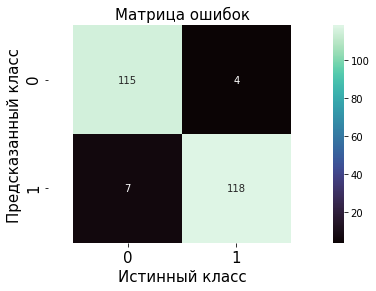

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.0,1.0,1.0,1.0,0.212325,0.954918,0.954918,0.955466,0.998759,0.985828


In [234]:
#Случайный лес со SMOTE
model = RandomForestClassifier()
errors, predictions, y_test = SMOTE_pred(df, important_features_IM, target_IM, model)
vis_confusionMatrix(y_test, predictions)
errors

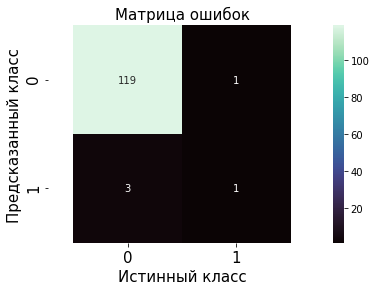

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.058926,0.875,0.996528,0.746479,0.179605,0.737705,0.967742,0.333333,NaN,NaN


In [232]:
#XGBoost
model = xgboost.XGBClassifier(verbosity=0)
errors, predictions, y_test = simple_pred(df, important_features_IM, target_IM, model)
vis_confusionMatrix(y_test, predictions)
errors

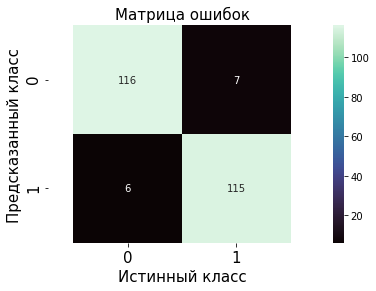

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.0,1.0,1.0,1.0,0.230822,0.946721,0.946721,0.946502,0.997959,0.983924


In [233]:
#XGBoost со SMOTE
model = xgboost.XGBClassifier(verbosity=0)
errors, predictions, y_test = SMOTE_pred(df, important_features_IM, target_IM, model)
vis_confusionMatrix(y_test, predictions)
errors

# Синдром_полиорганной_недостаточности

In [235]:
features_KBest = get_featureKBest(df, target_SPN, headers_SPN, 10)
features_RFE = get_featureRFE(df, target_SPN, headers_SPN, 10)
features_ET = get_featureExtraTrees(df, target_SPN, headers_SPN, 10)
features_L = get_featureLasso(df, target_SPN, headers_SPN, 10)

important_features_SPN = feature_vote(features_KBest, features_RFE, features_ET, features_L)
important_features_SPN

['Глубокая_гипотермия_1',
 'СЗП',
 'ВоА',
 'Заместительная_почечная_терапия',
 'Продолжительность_операции',
 'Возраст',
 'Эрмасса',
 'Креатинин_опер',
 'Объем_кровопотери']

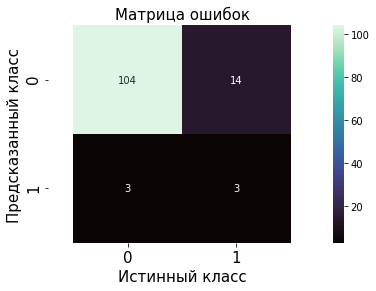

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.300463,0.709917,0.909722,0.228916,0.370266,0.574217,0.862903,0.26087,0.732372,0.348333


In [236]:
#Логистическая регрессия 
model = LogisticRegression()
errors, predictions, y_test = simple_pred(df, important_features_SPN, target_SPN, model)
vis_confusionMatrix(y_test, predictions)
errors

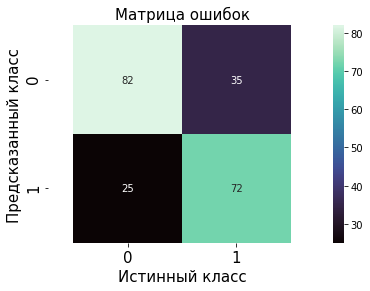

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.501003,0.748996,0.748996,-0.004016,0.529503,0.719626,0.719626,0.705882,0.808974,0.73364


In [237]:
#Логистическая регрессия со SMOTE
model = LogisticRegression()
errors, predictions, y_test = SMOTE_pred(df, important_features_SPN, target_SPN, model)
vis_confusionMatrix(y_test, predictions)
errors

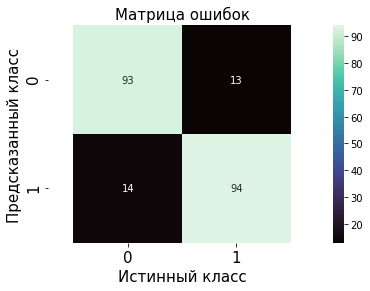

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.0,1.0,1.0,1.0,0.355202,0.873832,0.873832,0.874419,0.956517,0.889608


In [238]:
#Случайный лес со SMOTE
model = RandomForestClassifier()
errors, predictions, y_test = SMOTE_pred(df, important_features_SPN, target_SPN, model)
vis_confusionMatrix(y_test, predictions)
errors

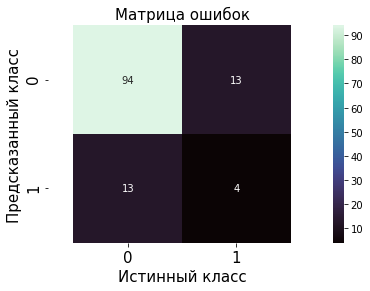

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.0,1.0,1.0,1.0,0.457905,0.556899,0.790323,0.235294,0.770673,0.433333


In [239]:
#XGBoost
model = xgboost.XGBClassifier(verbosity=0)
errors, predictions, y_test = simple_pred(df, important_features_SPN, target_SPN, model)
vis_confusionMatrix(y_test, predictions)
errors

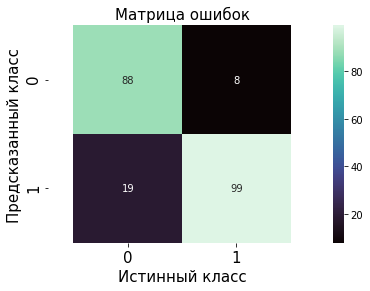

,train_MSE,test_ROC_AUC,train_accuracy,train_f-score,MSE,ROC_AUC,accuracy,f-score,crossval_ROC_AUC-mean,crossval_f-score-mean
0,0.0,1.0,1.0,1.0,0.355202,0.873832,0.873832,0.88,0.953045,0.896927


In [240]:
#XGBoost со SMOTE
model = xgboost.XGBClassifier(verbosity=0)
errors, predictions, y_test = SMOTE_pred(df, important_features_SPN, target_SPN, model)
vis_confusionMatrix(y_test, predictions)
errors